<a href="https://colab.research.google.com/github/Mlnvl/python_classp/blob/main/My_DV_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Step 1: Select a Dataset

I choose the data set Video Game Sales from kaggle.

https://www.kaggle.com/datasets/rush4ratio/video-game-sales-with-ratings


#Step 2: Tasks and Requirements

##Loading and exploration

This code imports a dataset stored on Google Drive into Google Colab using the Pandas library. It first mounts Google Drive to access it, then loads a CSV file containing information on video game sales. Finally, it displays a preview of the data and a list of available columns.

In [1]:
#import dataset from google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Pandas_data/Video_Games_Sales_as_at_22_Dec_2016.csv')

In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

##Cleaning

This code checks whether the janitor module is installed. If not, it installs it automatically via pip. Next, it imports the janitor library's clean_names function and applies it to df to clean up column names, making them more readable and consistent. Finally, it displays the list of modified columns.

In [5]:
try:
  import janitor
except:
  print("Module is not preinstalled!Installing now...")
  !pip install pyjanitor --quiet

Module is not preinstalled!Installing now...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.9/207.9 kB 4.2 MB/s eta 0:00:00


In [6]:
from janitor import clean_names

df = clean_names(df)
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'publisher', 'na_sales',
       'eu_sales', 'jp_sales', 'other_sales', 'global_sales', 'critic_score',
       'critic_count', 'user_score', 'user_count', 'developer', 'rating'],
      dtype='object')

This code cleans and prepares a Pandas dataset by deleting or transforming some missing values. It begins by displaying general information and the number of missing values. It then deletes specific columns and eliminates rows containing null values in certain columns. It then converts the year_of_release column to numeric type and converts the user_score values to float type. Finally, it redisplays the df information to verify the changes.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16717 non-null  object 
 1   platform         16719 non-null  object 
 2   year_of_release  16450 non-null  float64
 3   genre            16717 non-null  object 
 4   publisher        16665 non-null  object 
 5   na_sales         16719 non-null  float64
 6   eu_sales         16719 non-null  float64
 7   jp_sales         16719 non-null  float64
 8   other_sales      16719 non-null  float64
 9   global_sales     16719 non-null  float64
 10  critic_score     8137 non-null   float64
 11  critic_count     8137 non-null   float64
 12  user_score       10015 non-null  object 
 13  user_count       7590 non-null   float64
 14  developer        10096 non-null  object 
 15  rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
df.isnull().sum()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
name,2
platform,0
year_of_release,269
genre,2
publisher,54
na_sales,0
eu_sales,0
jp_sales,0
other_sales,0
global_sales,0


In [9]:
columns_to_drop = ['critic_score', 'critic_count','user_count','developer','rating']

df = df.drop(columns=columns_to_drop)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
df.isnull().sum()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
name,2
platform,0
year_of_release,269
genre,2
publisher,54
na_sales,0
eu_sales,0
jp_sales,0
other_sales,0
global_sales,0


In [42]:
df = df[df["year_of_release"].notnull()]
df = df[df["genre"].notnull()]
df = df[df["publisher"].notnull()]
df = df[df['year_of_release'] != 2020]
df = df[df["user_score"].notnull()] #I finaly choose de drop all row with missing user_score because remplacing with mean, median even by minimizing extrem, changed too much our dataset and would reduce reliability
df['year_of_release'] = pd.to_numeric(df['year_of_release'], errors='coerce').astype('Int64')
df['user_score']=df['user_score'].astype('float64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9836 entries, 0 to 16710
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             9836 non-null   object 
 1   platform         9836 non-null   object 
 2   year_of_release  9836 non-null   Int64  
 3   genre            9836 non-null   object 
 4   publisher        9836 non-null   object 
 5   na_sales         9836 non-null   float64
 6   eu_sales         9836 non-null   float64
 7   jp_sales         9836 non-null   float64
 8   other_sales      9836 non-null   float64
 9   global_sales     9836 non-null   float64
 10  user_score       9836 non-null   float64
 11  decade           9836 non-null   Int64  
dtypes: Int64(2), float64(6), object(4)
memory usage: 1018.2+ KB


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


##Filter, sort, and group data and Mathematical Operations

This code identifies video games with worldwide sales of less than 1 million copies. It filters these games into a new df(low_sales_games), counts their number, then displays this total.

In [43]:
low_sales_games = df[df['global_sales'] < 1]

num_low_sales_games = len(low_sales_games)

print(f"Number of games with less than 1 million total sales: {num_low_sales_games}")

Number of games with less than 1 million total sales: 8422


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


This code filters df to retain only games released after 2000 and with a user_score greater than 8. It stores the result in filtered_df and displays the first lines of the filtered dataframe.

In [44]:
filtered_df = df[(df['year_of_release'] > 2000) & (df['user_score'] > 8)]
filtered_df.head()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,user_score,decade
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,8.3,2000
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,8.5,2000
8,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,8.4,2000
11,Mario Kart DS,DS,2005,Racing,Nintendo,9.71,7.47,4.13,1.90,23.21,8.6,2000
16,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.02,9.09,0.98,3.96,21.04,8.2,2010


This code sorts df according to global sales (global_sales) in descending order, stores the result in sorted_df, then displays the first rows of the sorted dataframe.

In [45]:
sorted_df = df.sort_values(by=['global_sales'], ascending=False)
sorted_df.head()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,user_score,decade
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,8.0,2000
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,8.3,2000
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,8.0,2000
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,8.5,2000
7,Wii Play,Wii,2006,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,6.6,2000


This code calculates the average user score for each video game genre in the df DataFrame and displays the result. It groups the data by genre, then calculates the average user score for each group, enabling comparison of average scores between different video game genres.

In [46]:
grouped_df = df.groupby('genre')['user_score'].mean()
grouped_df

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,user_score
genre,
Action,5.857856
Adventure,4.686344
Fighting,6.671065
Misc,3.359839
Platform,5.541503
Puzzle,2.679580
Racing,5.161655
Role-Playing,7.326206
Shooter,6.383200


This code filters video games released after the year 2000, calculates the average user scores for each publisher, and then displays the top five publishers with the highest average scores.

In [47]:
filtered_df = df[df['year_of_release'] > 2000]
grouped_df = filtered_df.groupby('publisher')['user_score'].mean()
top_5_publishers = grouped_df.sort_values(ascending=False).head(5)
top_5_publishers

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,user_score
publisher,
Sunflowers,9.1
Square,9.1
Blue Byte,8.8
Kool Kizz,8.8
SNK,8.8


This code creates a pivot table that sums the sales for each video game genre across different regions (North America, Europe, Japan, other regions, and globally). It then sorts the genres by global sales in descending order.

The result shows that the "Action," "Sports," and "Shooter" genres are the most profitable globally, with high sales across all regions. Genres like "Role-Playing" are particularly popular in Japan, while niche genres like "Adventure" and "Puzzle" have lower sales.

In [48]:
sales_by_region_genre = pd.pivot_table(
    df,
    values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales','global_sales'],
    index=['genre'],
    aggfunc='sum'
)

sales_by_region_genre.sort_values(by='global_sales', ascending=False)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,eu_sales,global_sales,jp_sales,na_sales,other_sales
genre,,,,,
Action,423.68,1332.65,79.93,667.48,160.79
Sports,287.82,982.39,37.57,545.04,111.51
Shooter,270.22,845.02,19.09,464.45,90.90
Misc,146.14,532.13,33.95,299.33,52.47
Racing,175.34,522.39,28.90,255.19,62.99
Role-Playing,120.67,509.91,124.61,223.63,41.19
Platform,119.04,414.59,43.32,216.81,35.26
Simulation,85.86,276.78,28.24,138.71,23.85
Fighting,63.19,260.21,28.56,141.72,26.69


This code adds a new column to the DataFrame that represents the decade of each game's release year. It then groups the data by decade and genre, counts the number of games in each group, and renames the count column for clarity.

The result shows the number of games released per decade for each genre. For example, in the 1990s, there were 21 Role-Playing games and 10 Racing games. In the 2000s, the Action genre saw a significant increase with 1,240 games. This provides insights into the popularity and trends of different genres over time.

In [49]:
df['decade'] = (df['year_of_release'] // 10) * 10

games_per_decade_genre = df.groupby(['decade', 'genre'])['name'].count().reset_index()

games_per_decade_genre = games_per_decade_genre.rename(columns={'name': 'count'})

games_per_decade_genre

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,decade,genre,count
0,1980,Simulation,2
1,1990,Action,15
2,1990,Adventure,4
3,1990,Fighting,9
4,1990,Misc,3
5,1990,Platform,6
6,1990,Puzzle,3
7,1990,Racing,10
8,1990,Role-Playing,21
9,1990,Shooter,7


This code identifies the best-selling game for each year based on global sales. It first groups the data by the year of release and finds the index of the game with the highest global sales for each year. It then creates a table displaying the year of release, the name of the best-selling game, and its global sales.

The result shows the best-selling game for each year from 1985 to 2016. For example, in 1985, "Alter Ego" was the best-selling game with 0.03 million in global sales. In 2006, "Wii Sports" was the top seller with 82.53 million in global sales. This table highlights the most successful games each year, providing insights into the trends and popularity of different titles over time.

In [50]:
best_selling_games_by_year = df.loc[df.groupby('year_of_release')['global_sales'].idxmax()]

best_selling_games_table = best_selling_games_by_year[['year_of_release', 'name', 'global_sales']]

best_selling_games_table

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,year_of_release,name,global_sales
14472,1985,Alter Ego,0.03
14623,1988,SimCity,0.03
14612,1992,Doom,0.03
1567,1994,Battle Arena Toshinden,1.27
153,1996,Tekken 2,5.74
52,1997,Gran Turismo,10.95
106,1998,Tekken 3,7.16
67,1999,Gran Turismo 2,9.49
175,2000,Final Fantasy IX,5.30
28,2001,Gran Turismo 3: A-Spec,14.98


This function identifies the top 3 genres by global sales for each gaming platform. It groups the data by platform and genre, sums the global sales, and then selects the top 3 genres for each platform based on their global sales.

The result shows the top 3 genres by global sales for each gaming platform. For example, on the 3DS platform, the top genres are "Action," "Platform," and "Role-Playing." On the PS2 platform, "Action," "Sports," and "Racing" are the top genres. This table provides insights into which genres are most successful on different gaming platforms, helping to understand market preferences and trends.

In [51]:
def top_3_genres_by_platform(df):
    genre_sales_by_platform = df.groupby(['platform', 'genre'])['global_sales'].sum().reset_index()

    top_3_genres = genre_sales_by_platform.groupby('platform').apply(
        lambda x: x.sort_values('global_sales', ascending=False).head(3)
    ).reset_index(drop=True)

    return top_3_genres

top_3_genres_df = top_3_genres_by_platform(df)

top_3_genres_df

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-51-6917960dd9b9>:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_3_genres = genre_sales_by_platform.groupby('platform').apply(


,platform,genre,global_sales
0,3DS,Action,34.36
1,3DS,Platform,27.78
2,3DS,Role-Playing,18.94
3,DC,Adventure,1.33
4,DC,Sports,1.09
5,DC,Role-Playing,0.68
6,DS,Misc,95.79
7,DS,Simulation,92.63
8,DS,Action,74.67
9,GBA,Platform,53.78


This function identifies the genre with the highest relative sales for each gaming platform. It groups the data by platform and genre, sums the global sales, and calculates the relative sales by dividing each genre's sales by the total sales for that platform. It then selects the genre with the highest relative sales for each platform.

The result shows the genre with the highest relative sales for each gaming platform. For example, on the 3DS platform, the "Action" genre has the highest relative sales at 26.17%. On the PS2 platform, the "Action" genre is the most correlated with high relative sales at 23.71%. On the Wii platform, the "Sports" genre has the highest relative sales at 32.08%. This table provides insights into which genre contributes the most to the overall sales on each platform, highlighting the dominant genres in different gaming markets.

In [ ]:
def most_correlated_genre_by_platform(df):
    genre_sales_by_platform = df.groupby(['platform', 'genre'])['global_sales'].sum().reset_index()

    platform_total_sales = genre_sales_by_platform.groupby('platform')['global_sales'].transform('sum')

    genre_sales_by_platform['relative_sales'] = genre_sales_by_platform['global_sales'] / platform_total_sales

    most_correlated_genre = genre_sales_by_platform.loc[genre_sales_by_platform.groupby('platform')['relative_sales'].idxmax()]

    most_correlated_genre_table = most_correlated_genre[['platform', 'genre', 'relative_sales']]

    return most_correlated_genre_table

most_correlated_genre_df = most_correlated_genre_by_platform(df)

print(most_correlated_genre_df)

    platform         genre  relative_sales
0        3DS        Action        0.261671
12        DC     Adventure        0.292308
23        DS          Misc        0.170645
36       GBA      Platform        0.287041
44        GC        Action        0.188797
63        PC  Role-Playing        0.216952
68        PS        Action        0.256217
80       PS2        Action        0.237082
92       PS3        Action        0.329234
104      PS4        Action        0.317138
116      PSP        Action        0.245618
128      PSV        Action        0.325145
149      Wii        Sports        0.320819
155     WiiU      Platform        0.318337
171     X360       Shooter        0.299110
183       XB       Shooter        0.267060
194     XOne       Shooter        0.358477


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


This code performs linear regression analysis to determine the relationship between user scores and sales in different regions (Europe, North America, Japan, other regions, and globally). It fits a regression model for each dependent variable (sales) against the independent variable (user score), checks for statistical significance, and prints the results, including the direction of the relationship and the percentage of variance explained by the user score.

The result shows that there is a statistically significant positive relationship between user scores and sales in all regions.
Overall, user scores have a positive but relatively weak influence on sales across all regions, with the strongest impact on global sales.

In [ ]:
import statsmodels.api as sm

regression_df = df[['user_score','eu_sales', 'na_sales','jp_sales','other_sales' , 'global_sales']]

X = regression_df['user_score']  # Independent variable
dependent_vars = ['eu_sales', 'na_sales', 'jp_sales', 'other_sales', 'global_sales']

# Adding a constant to the independent variable
X = sm.add_constant(X)

# Looping through dependent variables
for dep_var in dependent_vars:
    y = regression_df[dep_var]  # Selecting the dependent variable

    # Fitting the linear regression model
    model = sm.OLS(y, X).fit()

    print(f"Regression results for {dep_var}:")

    # Checking for dependence based on p-value
    if model.pvalues['user_score'] < 0.05:
        print("  There is dependence between user_score and", dep_var)

        # Checking the direction of the relationship
        if model.params['user_score'] > 0:
            print("  The relationship between user_score and", dep_var, "is positive.")
        else:
            print("  The relationship between user_score and", dep_var, "is negative.")

        # Printing the percentage of sales explained
        print(f"  The user_score explains {model.rsquared * 100:.2f}% of the variance in {dep_var}.")

    else:
        print("  There is independence between user_score and", dep_var)

    print("\n" + "-" * 50 + "\n")  # Separator for clarity

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Regression results for eu_sales:
  There is dependence between user_score and eu_sales
  The relationship between user_score and eu_sales is positive.
  The user_score explains 2.08% of the variance in eu_sales.

--------------------------------------------------

Regression results for na_sales:
  There is dependence between user_score and na_sales
  The relationship between user_score and na_sales is positive.
  The user_score explains 2.36% of the variance in na_sales.

--------------------------------------------------

Regression results for jp_sales:
  There is dependence between user_score and jp_sales
  The relationship between user_score and jp_sales is positive.
  The user_score explains 2.02% of the variance in jp_sales.

--------------------------------------------------

Regression results for other_sales:
  There is dependence between user_score and other_sales
  The relationship between user_score and other_sales is positive.
  The user_score explains 1.74% of the varian

This code groups the data by publisher, sums the global sales for each publisher, sorts the publishers by their total global sales in descending order, and then selects the top 10 publishers. The result is converted into a DataFrame for better display.

The result shows the top 10 publishers based on their total global sales. The table lists publishers such as Electronic Arts, Nintendo, and Activision, along with their respective total global sales. This provides insights into which publishers have the highest cumulative sales, highlighting the most successful companies in the video game industry. For example, Electronic Arts has the highest total global sales at 950.98 million, followed by Nintendo at 858.07 million.

In [52]:
# Group by 'publisher' and sum 'global_sales'
publisher_sales = df.groupby('publisher')['global_sales'].sum()

# Sort in descending order and get the top 10
top_10_publishers = publisher_sales.sort_values(ascending=False).head(10)

# Convert the result to a DataFrame for better display
top_10_publishers_df = top_10_publishers.reset_index()
top_10_publishers_df.columns = ['Publisher', 'Total Global Sales']

# Display the table
display(top_10_publishers_df)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Publisher,Total Global Sales
0,Electronic Arts,950.98
1,Nintendo,858.07
2,Activision,612.73
3,Ubisoft,432.94
4,Sony Computer Entertainment,405.03
5,Take-Two Interactive,375.47
6,THQ,241.00
7,Microsoft Game Studios,218.95
8,Konami Digital Entertainment,163.31
9,Sega,155.65


##Data Visualization

This code calculates the total sales for each region (North America, Europe, Japan, and other regions) and creates a bar chart to visualize these sales. The chart uses different colors for each region, adds a grid for better readability, and includes data labels to show the exact sales values in millions.

The bar chart displays the total sales by region, with North America (na_sales) having the highest sales at 3113.65 million, followed by Europe (eu_sales) at 1791.5 million, other regions (other_sales) at 633.57 million, and Japan (jp_sales) at 453.69 million. This visualization highlights the significant dominance of the North American market in video game sales compared to other regions.

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


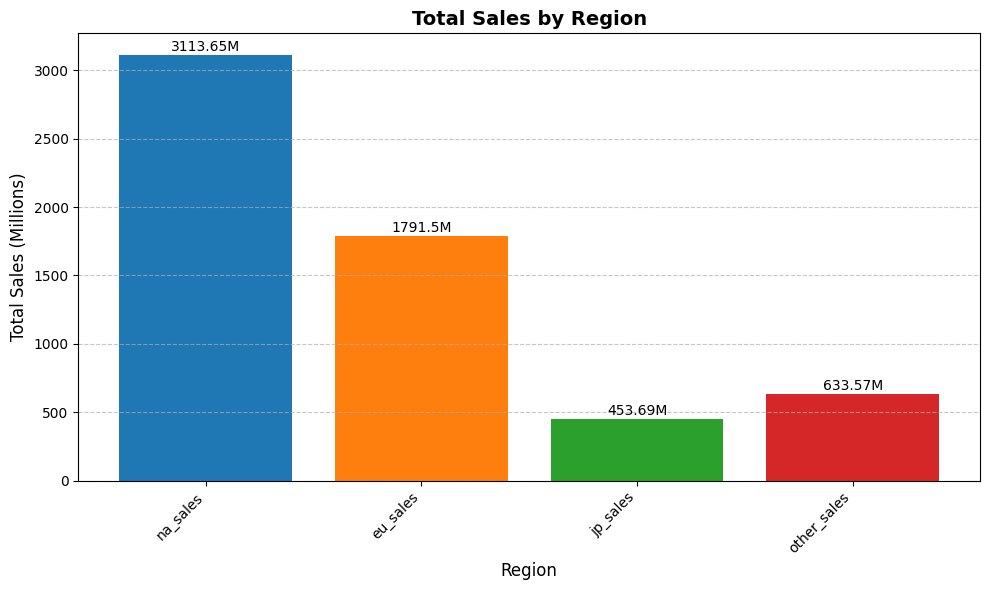

In [53]:
import matplotlib.pyplot as plt

# Calculate total sales per region
region_sales = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()

# Create a bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size for better readability
plt.bar(region_sales.index, region_sales.values, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])  # Use a color palette
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add a grid for better visualization

# Customize the chart
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Sales (Millions)', fontsize=12)  # Specify the unit
plt.title('Total Sales by Region', fontsize=14, fontweight='bold')  # Make the title more prominent
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Add data labels for better understanding
for i, v in enumerate(region_sales.values):
    plt.text(i, v + 5, str(round(v, 2)) + 'M', ha='center', va='bottom', fontsize=10)  # Display values in millions

# Display the chart
plt.tight_layout()
plt.show()

This code groups the data by the year of release and calculates the number of games and total sales for each year. It then creates a line plot with two y-axes: one for the number of games (in red) and one for the total sales (in blue). The plot visualizes the relationship between the number of games released and total sales per year.

The line plot shows the relationship between the number of games released and total sales per year from 1985 to 2016. The red line represents the number of games released each year, while the blue line represents the total sales. The plot indicates a significant increase in both the number of games and total sales from the late 1990s, peaking around 2008-2009, followed by a decline in subsequent years. This visualization highlights the growth and subsequent contraction of the video game market over the specified period.

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


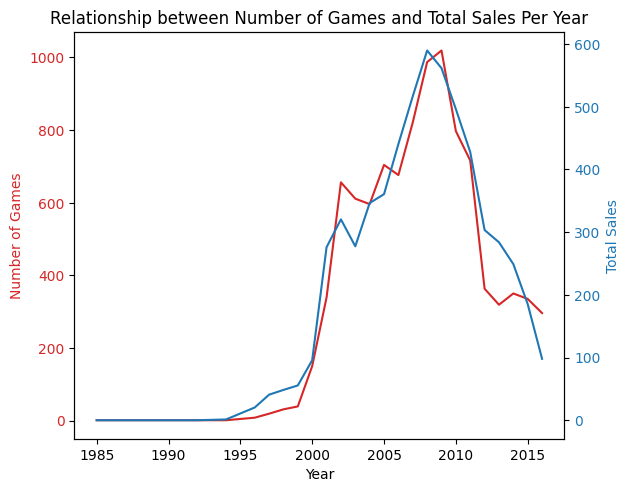

In [55]:
# Group by 'year_of_release' and calculate the number of games and total sales
games_and_sales_by_year = df.groupby('year_of_release').agg(
    num_games=('name', 'count'),
    total_sales=('global_sales', 'sum')
).reset_index()

# Create a line plot
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Games', color=color)
ax1.plot(games_and_sales_by_year['year_of_release'], games_and_sales_by_year['num_games'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Total Sales', color=color)  # we already handled the x-label with ax1
ax2.plot(games_and_sales_by_year['year_of_release'], games_and_sales_by_year['total_sales'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Relationship between Number of Games and Total Sales Per Year')
plt.show()

This code creates a scatter plot to visualize the relationship between user scores and global sales. It plots 'global_sales' on the y-axis against 'user_score' on the x-axis, using transparency for better visualization of overlapping points. The plot includes labels for the axes, a title, and a grid for improved readability.

The scatter plot shows the relationship between user scores and global sales. Each point represents a game, with the user score on the x-axis and the global sales (in millions) on the y-axis. The plot indicates that higher user scores generally correspond to higher global sales, although there is significant variability. Notably, games with very high user scores (close to 10) tend to have higher global sales, with some outliers achieving exceptionally high sales. This visualization suggests a positive correlation between user scores and global sales, highlighting the importance of user satisfaction in driving sales.

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


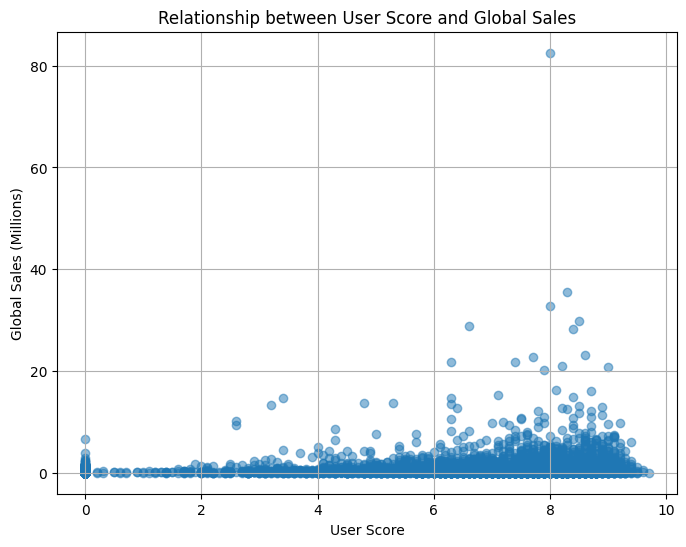

In [ ]:
# Create a scatter plot of 'global_sales' vs. 'user_score'
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.scatter(df['user_score'], df['global_sales'], alpha=0.5)  # Use alpha for transparency

# Customize the plot
plt.xlabel('User Score')
plt.ylabel('Global Sales (Millions)')
plt.title('Relationship between User Score and Global Sales')
plt.grid(True)

# Display the plot
plt.show()

This code creates a series of bar charts to visualize the best-selling genres in different regions (North America, Europe, Japan, and other regions). For each region, it groups the data by genre, sums the sales, and calculates the percentage of total sales for each genre. It then generates a bar chart with genre sales on the y-axis and genres on the x-axis, using a color gradient for better visualization. Percentage labels are added above each bar to show the proportion of total sales each genre represents.

This code creates bar charts to visualize the best-selling genres in different regions (North America, Europe, Japan, and other regions). For each region, it groups the data by genre, sums the sales, calculates the percentage of total sales for each genre, and then plots a bar chart. Each bar is color-coded using a colormap, and percentage labels are added above the bars for better understanding.

The bar charts show the best-selling genres in different regions based on total sales. Each chart represents a different region:

Best-Selling Genres in Other Sales:
   - The "Action" genre dominates with 24.5% of total sales.
   - "Sports" and "Shooter" follow with 17.6% and 14.3%, respectively.

Best-Selling Genres in Japan Sales:
   - The "Role-Playing" genre is the most popular with 27.5% of total sales.
   - "Action" follow with 17.6%.

Best-Selling Genres in Europe Sales:
   - The "Action" genre leads with 23.6% of total sales.
   - "Sports" and "Shooter" follow with 16.1% and 15.1%, respectively.

Best-Selling Genres in North America Sales:
   - The "Action" genre is the most popular with 21.4% of total sales.
   - "Sports" and "Shooter" follow with 17.7% and 14.9%, respectively.

These visualizations highlight the varying preferences for game genres across different regions, providing insights into market trends and consumer behavior.

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


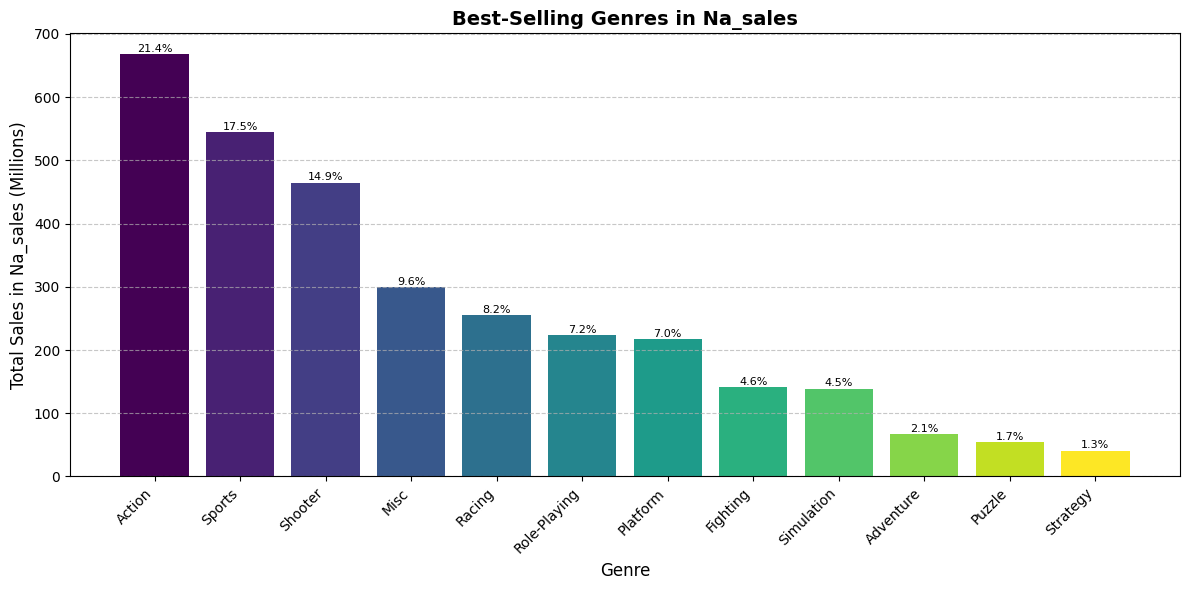

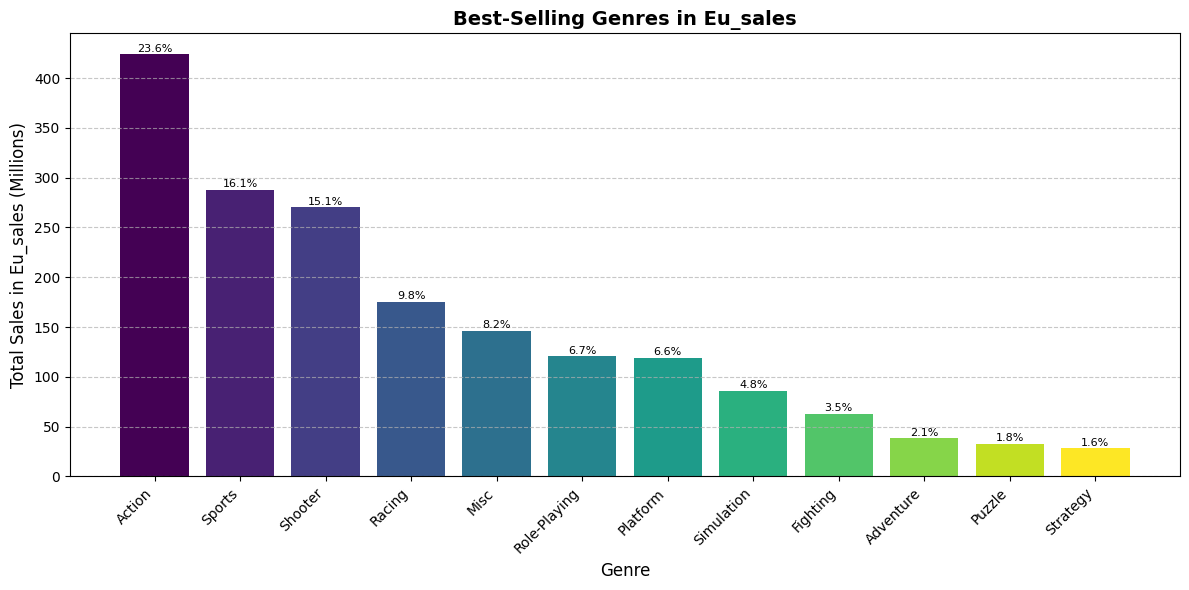

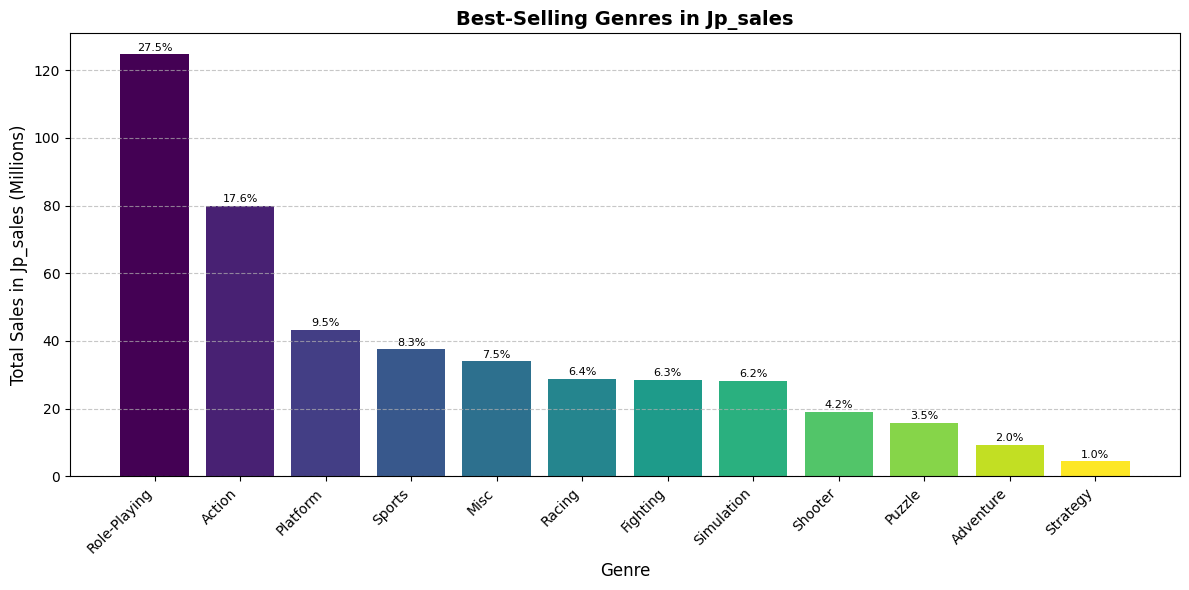

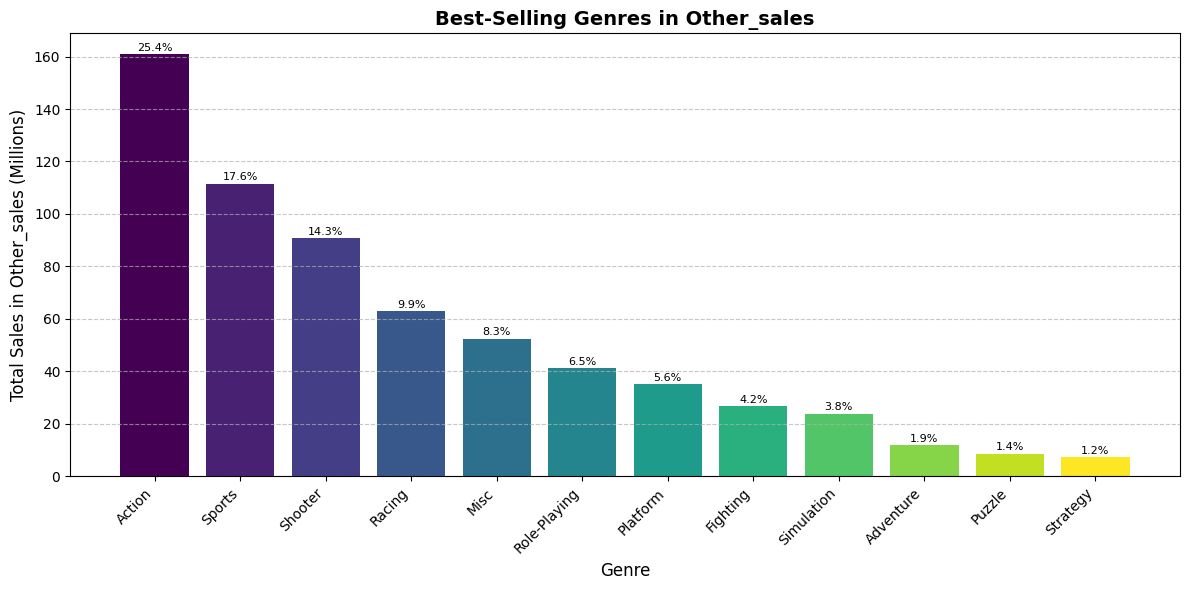

In [ ]:
import numpy as np

regions = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']

for region in regions:
    # Group by genre and sum sales for the current region
    genre_sales = df.groupby('genre')[region].sum().sort_values(ascending=False)

    # Calculate percentage for each genre
    genre_percentages = (genre_sales / genre_sales.sum()) * 100

    # Create a histogram for the current region
    plt.figure(figsize=(12, 6))  # Adjust figure size
    bars = plt.bar(genre_sales.index, genre_sales.values, color=plt.cm.viridis(np.linspace(0, 1, len(genre_sales))))  # Use colormap
    plt.xlabel('Genre', fontsize=12)
    plt.ylabel(f'Total Sales in {region.capitalize()} (Millions)', fontsize=12)
    plt.title(f'Best-Selling Genres in {region.capitalize()}', fontsize=14, fontweight='bold')
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Add percentage labels above bars
    for bar, percentage in zip(bars, genre_percentages):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f'{percentage:.1f}%', ha='center', va='bottom', fontsize=8)

    plt.tight_layout()
    plt.show()

This code create a crosstab of video game genres and platforms, then generate a heatmap. The heatmap visualizes the number of games per genre and platform, with annotations and a color bar for better understanding.

The heatmap displays the distribution of video games by genre and platform. Genres like "Action" and "Sports" are highly popular on platforms such as PS2 and X360, while other combinations are less represented.

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


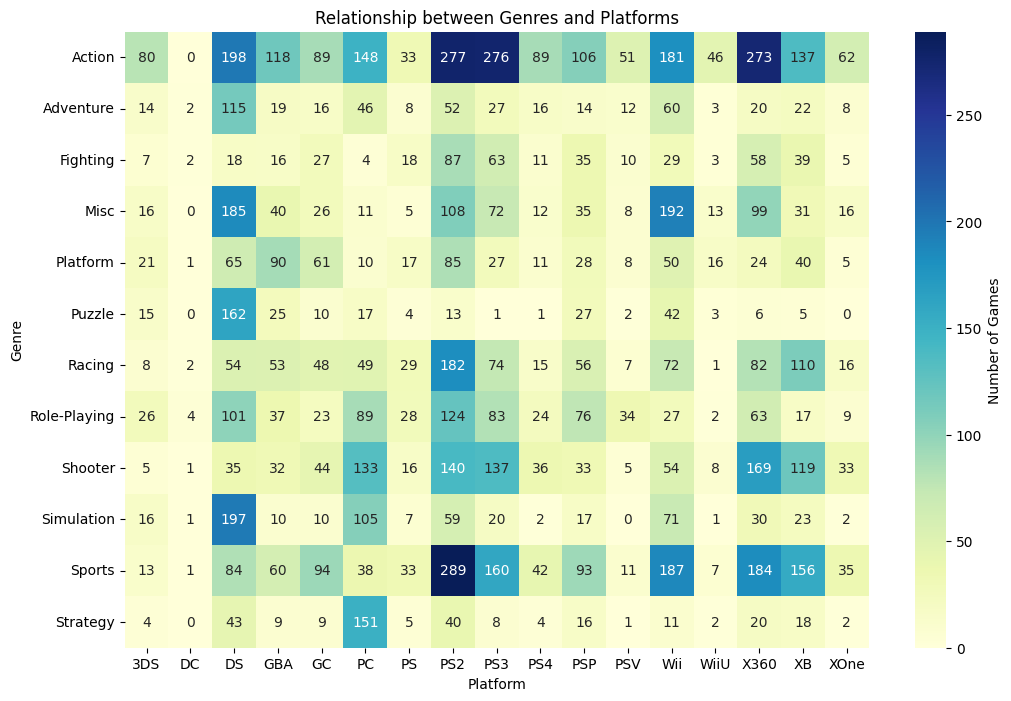

In [ ]:
import seaborn as sns

# Create a cross-tabulation of genres and platforms
genre_platform_counts = pd.crosstab(df['genre'], df['platform'])

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(genre_platform_counts, cmap="YlGnBu", annot=True, fmt="d", cbar_kws={'label': 'Number of Games'})
plt.xlabel("Platform")
plt.ylabel("Genre")
plt.title("Relationship between Genres and Platforms")
plt.show()

This code groups video game data by platform, sums the global sales for each platform, and sorts them in descending order. It then uses `seaborn` to create a bar plot displaying the total global sales for each platform. The plot is customized with labels, a title, rotated x-axis labels for readability, and a grid for better visualization.

The bar plot shows the distribution of total global sales by platform. The PS2 platform has the highest sales, followed by X360 and PS3. Sales decrease progressively for other platforms like Wii, DS, and PS4. Platforms such as PSV and DC have the lowest sales, indicating their lesser market impact compared to leading platforms.

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-56-e5f0924b89b2>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=platform_sales.index, y=platform_sales.values, palette="viridis")  # Use a color palette


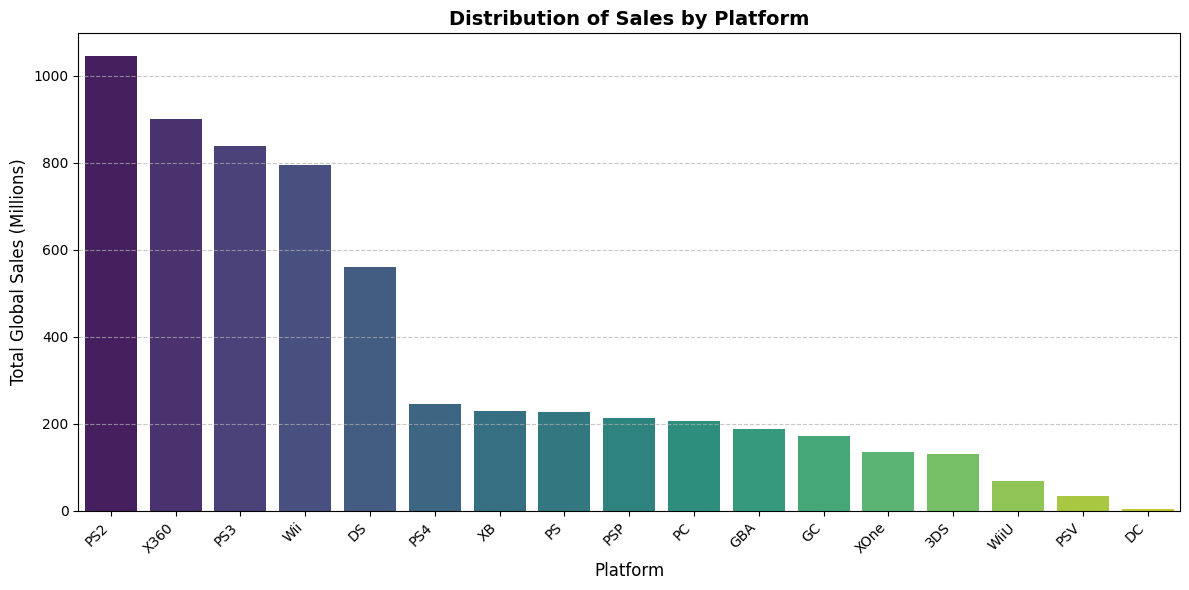

In [56]:
# Group data by platform and sum global sales
platform_sales = df.groupby('platform')['global_sales'].sum().sort_values(ascending=False)

# Create the histogram using seaborn for better styling
plt.figure(figsize=(12, 6))  # Adjust figure size for better visibility
sns.barplot(x=platform_sales.index, y=platform_sales.values, palette="viridis")  # Use a color palette

# Customize the plot
plt.xlabel("Platform", fontsize=12)  # Increase font size
plt.ylabel("Total Global Sales (Millions)", fontsize=12)  # Increase font size
plt.title("Distribution of Sales by Platform", fontsize=14, fontweight='bold')  # Increase font size and make bold
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate x-axis labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add a subtle grid

# Display the plot
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

This code selects sales data for different regions, calculates the correlation matrix to show the relationships between sales in these regions, and then create a heatmap. The heatmap visualizes the correlation coefficients, with annotations and a color map for better understanding.

The heatmap displays the correlation matrix of video game sales by region. High correlations are observed between NA (North America) and EU (Europe) sales (0.84), and between EU and other regions' sales (0.72). Lower correlations are seen between JP (Japan) sales and other regions, indicating different market dynamics in Japan compared to other regions.

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


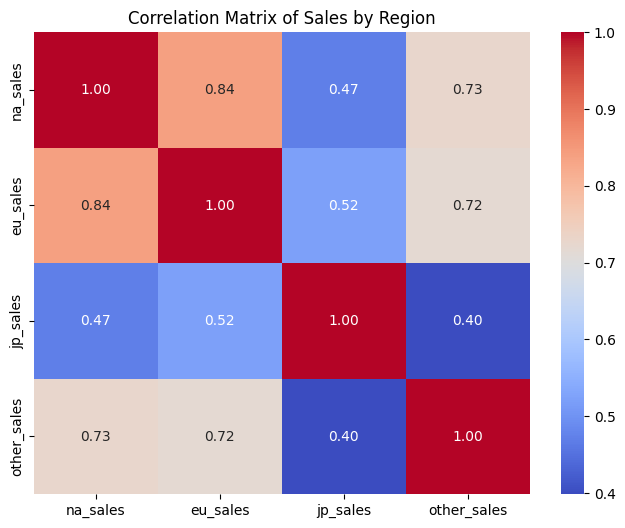

In [57]:
# Select the columns for the heatmap
sales_data = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']]

# Calculate the correlation matrix
correlation_matrix = sales_data.corr()

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Sales by Region')
plt.show()

This code creates a histogram to display the distribution of video game release years. It plot the data and applies a color gradient from the "viridis" colormap to each bar. The plot is customized with labels, a title, grid lines, and adjusted font sizes for better readability. The x-axis is limited to the range of the data up to 2017.

The histogram shows the number of video games released each year. The data indicates a significant increase in game releases starting around the year 2000, peaking around 2005-2010, with the highest number of releases occurring in these years. After 2010, there is a noticeable decline in the number of games released, with a slight increase again towards 2015. This visualization highlights the trends in game release activity over the years.

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


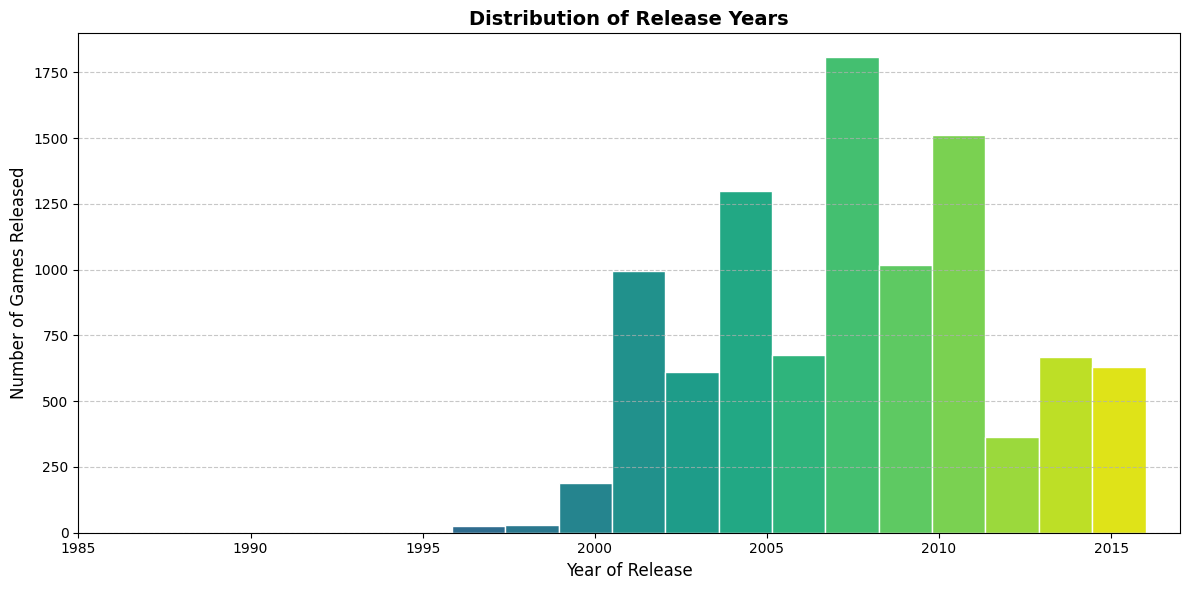

In [59]:
import numpy as np

# Create the histogram
plt.figure(figsize=(12, 6))  # Adjust figure size for better visibility
n, bins, patches = plt.hist(df['year_of_release'], bins=20, edgecolor='white')

# Applying color after plotting to avoid the error:
for i, patch in enumerate(patches):
    # Get a color from viridis colormap that changes with the index i
    color = plt.cm.viridis(i/len(patches))
    patch.set_facecolor(color)

# Customize the plot
plt.xlabel('Year of Release', fontsize=12)  # Increase font size
plt.ylabel('Number of Games Released', fontsize=12)  # Increase font size
plt.title('Distribution of Release Years', fontsize=14, fontweight='bold')  # Increase font size and make bold
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add a subtle grid
plt.xticks(fontsize=10)  # Adjust x-axis tick font size
plt.yticks(fontsize=10)  # Adjust y-axis tick font size

# Set the x-axis limits
plt.xlim(df['year_of_release'].min(), 2017)  # Limit x-axis to 2017

# Display the plot
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

This code calculates total sales per region from a DataFrame, defines colors for each region, creates a pie chart with this data, adds a title, and displays the chart.

The pie chart shows that North America accounts for 52.0% of total sales, Europe 29.9%, Japan 7.6%, and other regions 10.6%, illustrating the regional sales distribution.

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


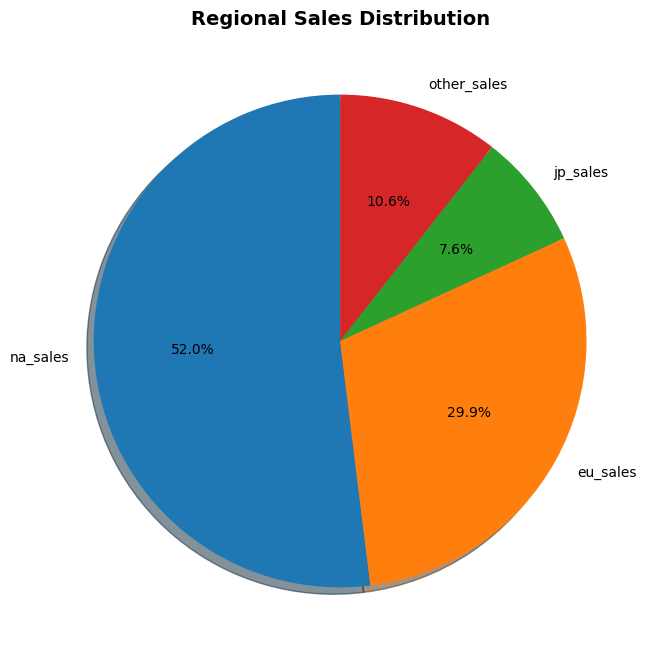

In [28]:
# Calculate total sales per region
region_sales = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()

# Define colors for the slices (using a color palette)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Example: Tableau color palette

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(region_sales.values, labels=region_sales.index, colors=colors,
        autopct='%1.1f%%', startangle=90,
        shadow=True)  # Add shadow

# Add a title
plt.title('Regional Sales Distribution', fontsize=14, fontweight='bold')

# Display the chart
plt.show()

This code creates a scatter plot to visualize the relationship between global sales and regional sales across different regions. It selects relevant columns from a DataFrame, plots the data points for each region, fits a linear trend line for each, and customizes the plot with labels, a title, a legend, and a grid.


The scatter plot shows the relationship between global sales and regional sales for North America, Europe, Japan, and other regions. The global sales increase, regional sales also tend to increase, with North America showing the steepest growth.

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


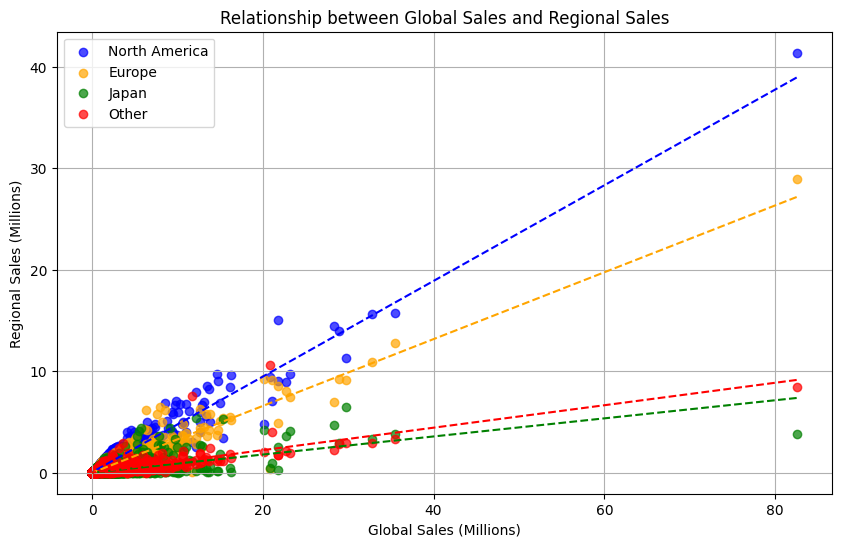

In [35]:
# Select the columns for the scatterplot
sales_data = df[['global_sales', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales']]

# Create the scatterplot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed

# Scatterplot and curve for North America sales
x = sales_data['global_sales']
y_na = sales_data['na_sales']
plt.scatter(x, y_na, label='North America', color='blue', alpha=0.7)
coefficients_na = np.polyfit(x, y_na, 1)
polynomial_na = np.poly1d(coefficients_na)
plt.plot(x, polynomial_na(x), color='blue', linestyle='--')

# Scatterplot and curve for Europe sales
y_eu = sales_data['eu_sales']
plt.scatter(x, y_eu, label='Europe', color='orange', alpha=0.7)
coefficients_eu = np.polyfit(x, y_eu, 1)
polynomial_eu = np.poly1d(coefficients_eu)
plt.plot(x, polynomial_eu(x), color='orange', linestyle='--')

# Scatterplot and curve for Japan sales
y_jp = sales_data['jp_sales']
plt.scatter(x, y_jp, label='Japan', color='green', alpha=0.7)
coefficients_jp = np.polyfit(x, y_jp, 1)
polynomial_jp = np.poly1d(coefficients_jp)
plt.plot(x, polynomial_jp(x), color='green', linestyle='--')

# Scatterplot and curve for Other sales
y_other = sales_data['other_sales']
plt.scatter(x, y_other, label='Other', color='red', alpha=0.7)
coefficients_other = np.polyfit(x, y_other, 1)
polynomial_other = np.poly1d(coefficients_other)
plt.plot(x, polynomial_other(x), color='red', linestyle='--')

# Customize the plot
plt.xlabel('Global Sales (Millions)')
plt.ylabel('Regional Sales (Millions)')
plt.title('Relationship between Global Sales and Regional Sales')
plt.legend(loc='upper left')  # Add a legend
plt.grid(True)  # Add a grid

# Display the plot
plt.show()

##SQL Integration

This code attempts to import the sqlalchemy module and, if it is not already installed, it installs the module using pip without displaying the installation process.

In [60]:
try:
  import sqlalchemy
except:
  print("Module is not preinstalled!Installing now...")
  !pip install sqlalchemy --quiet

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


This code imports the os module and retrieves the current working directory using the os.getcwd() function.

In [15]:
# current working directory
import os
os.getcwd()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'/content'

This code imports necessary modules, creates a SQLite database engine, and writes a DataFrame to a SQLite database table named `video_game_sales`. It then verifies the insertion by querying the first five rows from the table and printing them.

The result displays the first five rows from the `video_game_sales` table, showing details of video games such as their names, platforms, release years, genres, publishers, and sales figures across different regions. This confirms that the DataFrame has been successfully written to the SQLite database.

In [16]:
import sqlite3
from sqlalchemy import create_engine, text

engine = create_engine('sqlite:///my_database.db')

# Assuming your processed DataFrame is named 'df'
df.to_sql('video_game_sales', engine, if_exists='replace', index=False)


#Verification
with engine.connect() as conn:
    result = conn.execute(text("SELECT * FROM video_game_sales LIMIT 5"))
    for row in result:
        print(row)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


('Wii Sports', 'Wii', 2006, 'Sports', 'Nintendo', 41.36, 28.96, 3.77, 8.45, 82.53, 8.0)
('Mario Kart Wii', 'Wii', 2008, 'Racing', 'Nintendo', 15.68, 12.76, 3.79, 3.29, 35.52, 8.3)
('Wii Sports Resort', 'Wii', 2009, 'Sports', 'Nintendo', 15.61, 10.93, 3.28, 2.95, 32.77, 8.0)
('New Super Mario Bros.', 'DS', 2006, 'Platform', 'Nintendo', 11.28, 9.14, 6.5, 2.88, 29.8, 8.5)
('Wii Play', 'Wii', 2006, 'Misc', 'Nintendo', 13.96, 9.18, 2.93, 2.84, 28.92, 6.6)


This code writes and executes an SQL query to find the video game genre with the highest average global sales from the `video_game_sales` table. It groups the data by genre, calculates the average sales, orders the results in descending order, and limits the output to the top genre. The result is then printed in a formatted string.

The result indicates that the genre with the highest average sales is "Shooter," with an average of 0.85 million units sold.

In [65]:
# Write the SQL query
query = """
SELECT genre, AVG(global_sales) AS avg_sales
FROM video_game_sales
GROUP BY genre
ORDER BY avg_sales DESC
LIMIT 1;
"""

# Execute the query and fetch the result
with engine.connect() as conn:
    result = conn.execute(text(query))
    for row in result:
        print(f"The genre with the highest average sales is: {row.genre} with an average of {row.avg_sales:.2f} million units.")

The genre with the highest average sales is: Shooter with an average of 0.85 million units.


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


This code writes and executes an SQL query to find the video game platform with the highest average global sales from the `video_game_sales` table. It groups the data by platform, calculates the average sales, orders the results in descending order, and limits the output to the top platform. The result is then printed in a formatted string.

The result indicates that the platform with the highest average game sales is the PS (PlayStation), with an average of 1.12 million units sold.

In [61]:
# Write the SQL query
query = """
SELECT platform, AVG(global_sales) AS avg_sales
FROM video_game_sales
GROUP BY platform
ORDER BY avg_sales DESC
LIMIT 1;
"""

# Execute the query and fetch the result
with engine.connect() as conn:
    result = conn.execute(text(query))
    for row in result:
        print(f"The platform with the highest average game sales is: {row.platform} with an average of {row.avg_sales:.2f} million units.")

The platform with the highest average game sales is: PS with an average of 1.12 million units.


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


This code writes and executes an SQL query to calculate the total European sales for video games in the "Action" genre from the `video_game_sales` table. It filters the data to include only the "Action" genre and sums the European sales. The result is then printed in a formatted string.

The result indicates that the total European sales for video games in the "Action" genre amount to 423.68 million units.

In [66]:
# Write the SQL query
query = """
SELECT SUM(eu_sales) AS total_eu_sales
FROM video_game_sales
WHERE genre = 'Action';
"""

# Execute the query and fetch the result
with engine.connect() as conn:
    result = conn.execute(text(query))
    for row in result:
        print(f"The total EU sales for the Action genre is: {row.total_eu_sales:.2f} million units.")

The total EU sales for the Action genre is: 423.68 million units.


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


This code writes and executes an SQL query to calculate the total North American sales for video games in the "Action" genre, grouped by decade, from the `video_game_sales` table. It categorizes the years into decades, sums the North American sales for each decade, and orders the results by decade. The results are then printed in a formatted string.

The result shows the total North American sales for the "Action" genre across different decades:
- 1990s, Total NA Sales: 19.01 million units
- 2000s, Total NA Sales: 392.21 million units
- 2010s, Total NA Sales: 256.26 million units

In [67]:
# Write the SQL query
query = """
SELECT CAST(year_of_release / 10 AS INT) * 10 AS decade, SUM(na_sales) AS total_na_sales
FROM video_game_sales
WHERE genre = 'Action'
GROUP BY decade
ORDER BY decade;
"""

# Execute the query and fetch the result
with engine.connect() as conn:
    result = conn.execute(text(query))
    for row in result:
        print(f"Decade: {row.decade}, Total NA Sales for Action genre: {row.total_na_sales:.2f} million units")

Decade: 1990, Total NA Sales for Action genre: 19.01 million units
Decade: 2000, Total NA Sales for Action genre: 392.21 million units
Decade: 2010, Total NA Sales for Action genre: 256.26 million units


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


This code writes and executes an SQL query to count the number of video games with a user score of 8 or higher from the `video_game_sales` table. It filters the data based on the user score and counts the matching records. The result is then printed in a formatted string.

The result indicates that there are 2,544 games with a user rating of 8 or higher.

In [24]:
# Write the SQL query
query = """
SELECT COUNT(*) AS number_of_games
FROM video_game_sales
WHERE user_score >= 8;
"""

# Execute the query and fetch the result
with engine.connect() as conn:
    result = conn.execute(text(query))
    for row in result:
        print(f"There are {row.number_of_games} games with a rating of 8 or higher.")

There are 2544 games with a rating of 8 or higher.


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


This code executes two SQL queries to find the best-selling video game for two different criteria: the year with the highest total sales and the year with the most game releases. For each criterion, it identifies the top-selling game of that year, including the game's name, genre, global sales, and year of release. The results are then printed in formatted strings.

The results indicate:
- The best-selling game of the year with the highest total sales (2008) was 'Mario Kart Wii' (Genre: Racing) with 35.52 million units sold.
- The best-selling game of the year with the most releases (2009) was 'Wii Sports Resort' (Genre: Sports) with 32.77 million units sold.

In [31]:
with engine.connect() as conn:
    result = conn.execute(text("""
SELECT name, genre, global_sales, year_of_release
FROM video_game_sales
WHERE year_of_release = (SELECT year_of_release FROM video_game_sales GROUP BY year_of_release ORDER BY SUM(global_sales) DESC LIMIT 1)
ORDER BY global_sales DESC
LIMIT 1;
    """))
    for row in result:
        print(f"The best-selling game of the year with the highest total sales ({row.year_of_release}) was '{row.name}' (Genre: {row.genre}) with {row.global_sales:.2f} million units sold.")


#Best-selling game of the year with the most releases
with engine.connect() as conn:
    result = conn.execute(text("""
SELECT name, genre, global_sales, year_of_release
FROM video_game_sales
WHERE year_of_release = (SELECT year_of_release FROM video_game_sales GROUP BY year_of_release ORDER BY COUNT(*) DESC LIMIT 1)
ORDER BY global_sales DESC
LIMIT 1;
    """))
    for row in result:
        print(f"The best-selling game of the year with the most releases ({row.year_of_release}) was '{row.name}' (Genre: {row.genre}) with {row.global_sales:.2f} million units sold.")

The best-selling game of the year with the highest total sales (2008) was 'Mario Kart Wii' (Genre: Racing) with 35.52 million units sold.
The best-selling game of the year with the most releases (2009) was 'Wii Sports Resort' (Genre: Sports) with 32.77 million units sold.


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
